In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf

In [2]:
train = pd.read_csv("/train.csv")
test = pd.read_csv("/test.csv")
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
y_train = train['label'].astype('float32')
X_train = train.drop(['label'], axis=1).astype('int32')
X_test = test.astype('float32')
X_train.shape, y_train.shape, X_test.shape

((42000, 784), (42000,), (28000, 784))

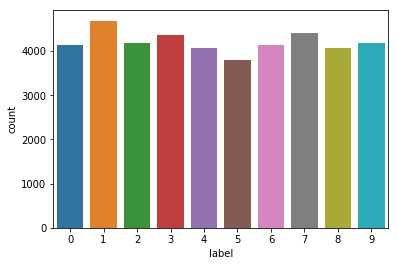

In [4]:
sns.countplot(x='label', data=train);

In [5]:
# Data normalization
X_train = X_train/255
X_test = X_test/255

In [6]:
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)
X_train.shape, X_test.shape

((42000, 28, 28, 1), (28000, 28, 28, 1))

In [7]:
# one-hot encoding
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes = 10)
y_train.shape

Using TensorFlow backend.


(42000, 10)

In [8]:
print(train['label'].head())
y_train[0:5,:]

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size = 0.1, random_state=42)

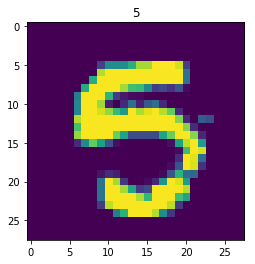

In [10]:
plt.imshow(X_train[1][:,:,0])
plt.title(y_train[1].argmax());

In [11]:
from keras.layers import Input,InputLayer, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout
from keras.models import Sequential,Model
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint,LearningRateScheduler
import keras
from keras import backend as K

In [12]:
# Building a CNN model
input_shape = (28,28,1)
X_input = Input(input_shape)

# layer 1
x = Conv2D(64,(3,3),strides=(1,1),name='layer_conv1',padding='same')(X_input)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2),name='maxPool1')(x)
# layer 2
x = Conv2D(32,(3,3),strides=(1,1),name='layer_conv2',padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2),name='maxPool2')(x)
# layer 3
x = Conv2D(32,(3,3),strides=(1,1),name='conv3',padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2), name='maxPool3')(x)
# fc
x = Flatten()(x)
x = Dense(64,activation ='relu',name='fc0')(x)
x = Dropout(0.25)(x)
x = Dense(32,activation ='relu',name='fc1')(x)
x = Dropout(0.25)(x)
x = Dense(10,activation ='softmax',name='fc2')(x)

conv_model = Model(inputs=X_input, outputs=x, name='Predict')
conv_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
layer_conv1 (Conv2D)         (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
maxPool1 (MaxPooling2D)      (None, 14, 14, 64)        0         
_________________________________________________________________
layer_conv2 (Conv2D)         (None, 14, 14, 32)        18464     
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 32)        128       
__________

### Note : 
In SGD 30 epochs is a reasonable choice to use although it takes a long time to compute.<br>
Adam optimizer converges quicker. Use one of the following optimizers.

In [13]:

# Adam optimizer
conv_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
conv_model.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_cv,y_cv))


Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 509s 13ms/step - loss: 0.5576 - acc: 0.8157 - val_loss: 0.1327 - val_acc: 0.9619
Epoch 2/10
37800/37800 [==============================] - 529s 14ms/step - loss: 0.1354 - acc: 0.9619 - val_loss: 0.1134 - val_acc: 0.9717
Epoch 3/10
37800/37800 [==============================] - 561s 15ms/step - loss: 0.0958 - acc: 0.9729 - val_loss: 0.0682 - val_acc: 0.9795
Epoch 4/10
37800/37800 [==============================] - 487s 13ms/step - loss: 0.0805 - acc: 0.9773 - val_loss: 0.0466 - val_acc: 0.9874
Epoch 5/10
37800/37800 [==============================] - 492s 13ms/step - loss: 0.0642 - acc: 0.9829 - val_loss: 0.0747 - val_acc: 0.9795
Epoch 6/10
37800/37800 [==============================] - 563s 15ms/step - loss: 0.0546 - acc: 0.9851 - val_loss: 0.0496 - val_acc: 0.9852
Epoch 7/10
37800/37800 [==============================] - 499s 13ms/step - loss: 0.0507 - acc: 0.9860 - val_loss: 0.0

In [13]:

# SGD optimizer
sgd = SGD(lr=0.0005, momentum=0.5, decay=0.0, nesterov=False) 
conv_model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
conv_model.fit(X_train, y_train, epochs=30, validation_data=(X_cv, y_cv))


Train on 37800 samples, validate on 4200 samples
Epoch 1/12
37800/37800 [==============================] - 470s 12ms/step - loss: 1.8059 - acc: 0.3838 - val_loss: 1.0841 - val_acc: 0.7607
Epoch 2/12
37800/37800 [==============================] - 450s 12ms/step - loss: 1.0518 - acc: 0.6703 - val_loss: 0.4946 - val_acc: 0.9129
Epoch 3/12
37800/37800 [==============================] - 448s 12ms/step - loss: 0.6958 - acc: 0.7888 - val_loss: 0.2896 - val_acc: 0.9398
Epoch 4/12
37800/37800 [==============================] - 446s 12ms/step - loss: 0.5158 - acc: 0.8444 - val_loss: 0.2107 - val_acc: 0.9529
Epoch 5/12
37800/37800 [==============================] - 433s 11ms/step - loss: 0.4248 - acc: 0.8738 - val_loss: 0.1649 - val_acc: 0.9588
Epoch 6/12
37800/37800 [==============================] - 432s 11ms/step - loss: 0.3527 - acc: 0.8980 - val_loss: 0.1396 - val_acc: 0.9614
Epoch 7/12
37800/37800 [==============================] - 434s 11ms/step - loss: 0.3118 - acc: 0.9088 - val_loss: 0.1

In [14]:
y_pred = conv_model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)
my_submission = pd.DataFrame({'ImageId': list(range(1, len(y_pred)+1)), 'Label': y_pred})
my_submission.to_csv('submission.csv', index=False)

## Test Accuracy

Adam optimizer (10 epochs, batch size = 100) : 0.98985<br>
SGD optimizer (12 epochs) : 0.97600